# Computing Flow Map Jacobians using the Planet-Satellite Approach
This notebook highlights the planet-satellite approach that was used in Harms et al. 2023 for comparing resampling methods to traditional methods.  The results of this notebook are similar to figures 3 and 7 from the paper.  

The algorithmic portion of this code is in the file `LGR/planet_satellite.py`, which is here imported with other necessary libraries.  

In [10]:
import sys, copy, os
import numpy as np

from LGR.planet_satellite import *
from LGR.plotting import *
from Flows.Flows import *

## Establishing the flow
Here we are using the double gyre flow, as was done in the paper.  We are computing over the domain $t\in [0,10]$ with a $\Delta t = 0.1$ interval.  Standard parameters are used but can be changed by the user.  The standard spatial domain of $(x,y) \in ([0,2],[0,1])$ is applied.  All particles studied in this process are seeded onto a uniform grid determined by the number of rows `n_y`.  An edge buffer of `eps` is used to prevent spurious results at the domain boundaries.  

In [11]:
# Flow type and duration:
flowname = "Gyre"
n_steps = 100
dt = 0.1    

# optional parameters
parameters = {  # These are specified as defaults as well. 
    "A": 0.1,
    "epsilon": 0.1,
    "omega":2*np.pi/10
}

# Initialize the flow 
flow = Flow()
flow.predefined_function(flowname)

# Make vectors associated with each axis.
domain = np.array([[0, 2],[0, 1]])
n_y = 25            # number of rows
n_x = 2*n_y         # number of columns
eps = 0.001        # for visualization
y_vec = np.linspace(domain[1,0]+eps, domain[1,1]-eps, n_y+1)     # 25 rows
x_vec = np.linspace(domain[0,0]+eps, domain[0,1]-eps, n_x+1)     # 50 columns

# Then, make the mesh grid and flatten it to get a single vector of positions.  
mesh = np.meshgrid(x_vec, y_vec)

# Generate a time vector
tvec = np.linspace(0, dt*n_steps, n_steps+1) 

## Numerical Experiment: Computing FTLE fields using various satellite spacing and resampling. 
Here we perform a numerical experiment to consider the influence of particle spacing and intermittent resampling on ftle results.  Four FTLE fields are computed:
1. Using only first and last trajectory locations with fine ($\Delta x = 1e-5$) initial particle spacing. 
2. Resampling neighbors at each time step with fine ($\Delta x = 1e-5$) initial particle spacing. 
3. Using only first and last trajectory locations with coarse ($\Delta x = 0.1$) initial particle spacing. 
4. Resampling neighbors at each time step with coarse ($\Delta x = 0.1$) initial particle spacing. 

In [13]:
# Computing FTLEs with fine particle spacing
dx_fine = 0.00001
ftle_fine_resampled = np.zeros((len(y_vec), len(x_vec)))
ftle_fine_traditional = np.zeros((len(y_vec), len(x_vec)))

# Computing FTLEs with coarse particle spacing
dx_coarse = 0.1
ftle_coarse_resampled = np.zeros((len(y_vec), len(x_vec)))
ftle_coarse_traditional = np.zeros((len(y_vec), len(x_vec)))
c=0
pvals = []
for i, y in enumerate(y_vec):
    for j, x in enumerate(x_vec):
        
        if c % 50 == 0:
            print(f"particle {c} out of {len(y_vec) * len(x_vec)}")
        
        ic = np.array([x,y])
        
        # compute fine FTLE without resampling
        p_fine_traditional = PSParticle(flow, np.copy(ic), tvec, dx_fine, domain=domain, resample=False)
        ftle_fine_traditional[i,j] = p_fine_traditional.ftle
        
        # compute fine FTLE with resampling
        p_fine_resampled = PSParticle(flow, np.copy(ic), tvec, dx_fine, domain=domain, resample=True)
        ftle_fine_resampled[i,j] = p_fine_resampled.ftle
        
        # compute coarse FTLE without resampling
        p_coarse_traditional = PSParticle(flow, np.copy(ic), tvec, dx_coarse, domain=domain, resample=False)
        ftle_coarse_traditional[i,j] = p_coarse_traditional.ftle
        
        # compute coarse FTLE with resampling
        p_coarse_resampled = PSParticle(flow, np.copy(ic), tvec, dx_coarse, domain=domain, resample=True)
        ftle_coarse_resampled[i,j] = p_coarse_resampled.ftle

        c+=1 

particle 0 out of 5151
particle 25 out of 5151
particle 50 out of 5151
particle 75 out of 5151
particle 100 out of 5151
particle 125 out of 5151
particle 150 out of 5151
particle 175 out of 5151
particle 200 out of 5151
particle 225 out of 5151
particle 250 out of 5151
particle 275 out of 5151
particle 300 out of 5151
particle 325 out of 5151
particle 350 out of 5151
particle 375 out of 5151
particle 400 out of 5151
particle 425 out of 5151
particle 450 out of 5151
particle 475 out of 5151
particle 500 out of 5151
particle 525 out of 5151
particle 550 out of 5151
particle 575 out of 5151
particle 600 out of 5151
particle 625 out of 5151
particle 650 out of 5151
particle 675 out of 5151
particle 700 out of 5151
particle 725 out of 5151
particle 750 out of 5151
particle 775 out of 5151
particle 800 out of 5151
particle 825 out of 5151
particle 850 out of 5151
particle 875 out of 5151
particle 900 out of 5151
particle 925 out of 5151
particle 950 out of 5151
particle 975 out of 5151
parti

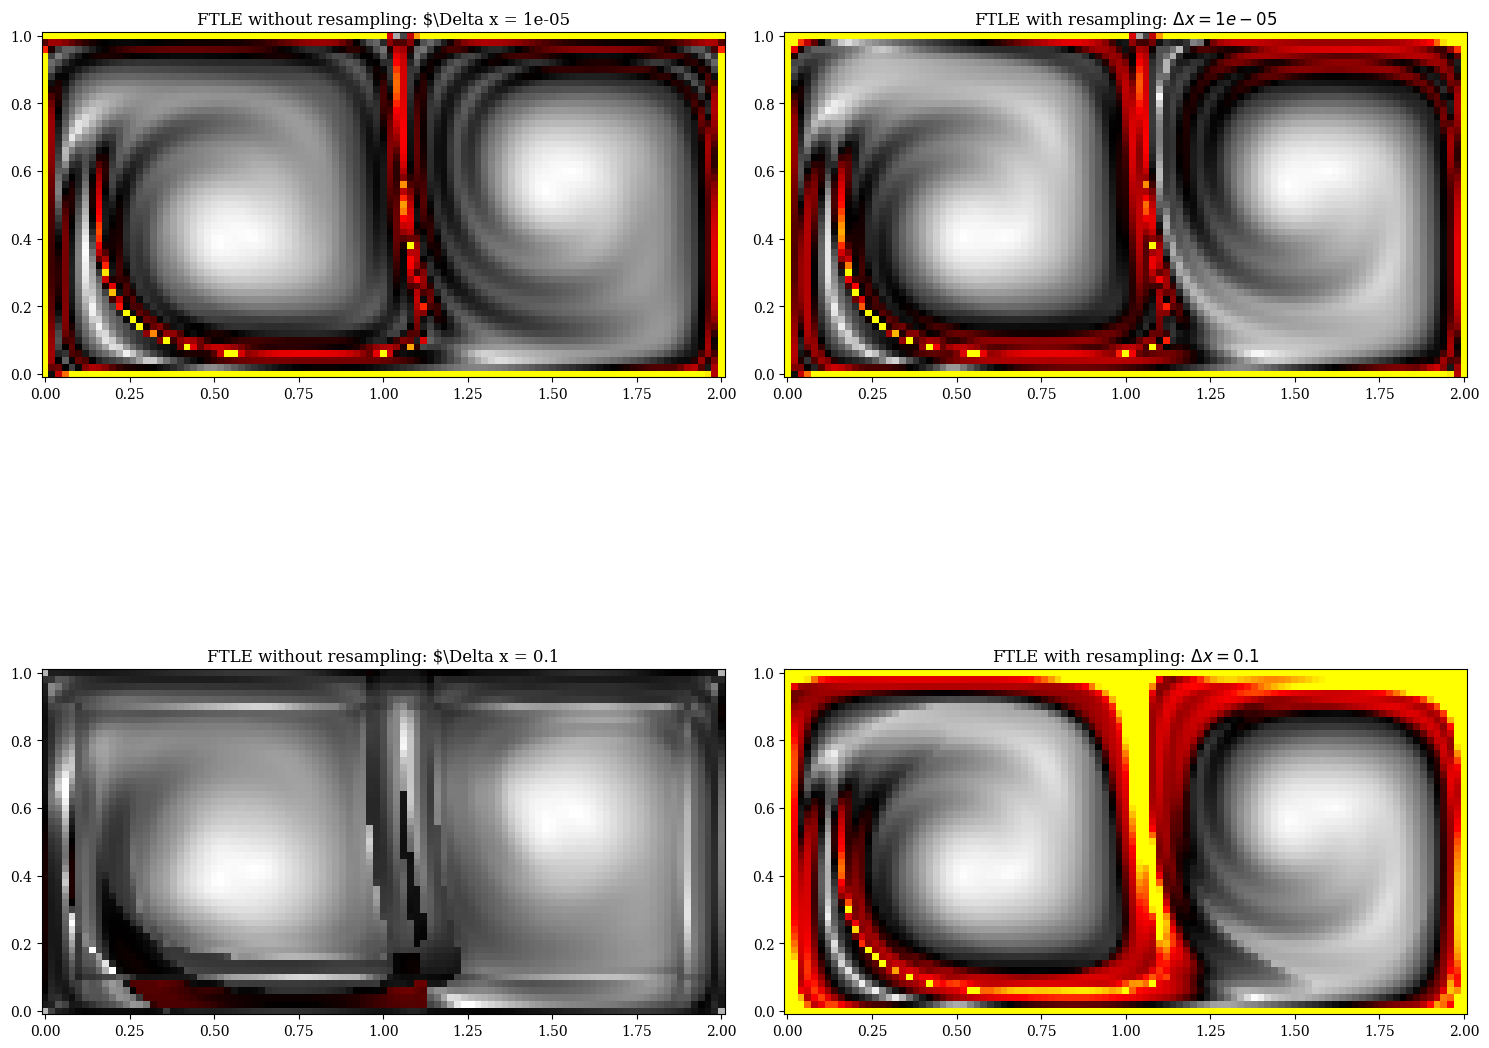

In [14]:
# Plot the results

fig, axs = plt.subplots(2,2)
    
# limit the FTLE plot colorbar
clim = [0,0.5]

axs[0,1].pcolormesh(mesh[0], mesh[1], ftle_fine_resampled, cmap="gray2hot", vmin=clim[0], vmax=clim[1])
axs[0,1].axis('scaled')
axs[0,1].set_title(f'FTLE with resampling: $\Delta x = {dx_fine}$')

axs[0,0].pcolormesh(mesh[0], mesh[1], ftle_fine_traditional, cmap="gray2hot", vmin=clim[0], vmax=clim[1])
axs[0,0].axis('scaled')
axs[0,0].set_title(f'FTLE without resampling: $\Delta x = {dx_fine}')

axs[1,1].pcolormesh(mesh[0], mesh[1], ftle_coarse_resampled, cmap="gray2hot", vmin=clim[0], vmax=clim[1])
axs[1,1].axis('scaled')
axs[1,1].set_title(f'FTLE with resampling: $\Delta x = {dx_coarse}$')

axs[1,0].pcolormesh(mesh[0], mesh[1], ftle_coarse_traditional, cmap="gray2hot", vmin=clim[0], vmax=clim[1])
axs[1,0].axis('scaled')
axs[1,0].set_title(f'FTLE without resampling: $\Delta x = {dx_coarse}')

fig.tight_layout()

plt.show()